# 정수 최적화
- 선형관계를 만족하되 일부 변수가 정수로 제한되는 경우(물품 수량 등은 정수여야 함)
- Mixed Integer Programs (MIPs)라고 함
- 일부 변수가 불리언일 수도 있음 (작업의 수행 여부를 결정)
- Glop: 구글이 만든 선형 최적화 도구, OR tools을 통해서 사용 (래퍼 함수)
- 참고: https://developers.google.com/optimization/introduction/python
- 예제: https://developers.google.com/optimization/examples

In [1]:
# !pip install ortoolpy

## 예제
- 목적 함수
 - Maximize x + 10y
- 제약 조건

x + 7 y	≤	17.5  
x	≤	3.5  
x	≥	0  
y	≥	0  
x, y 는 정수  

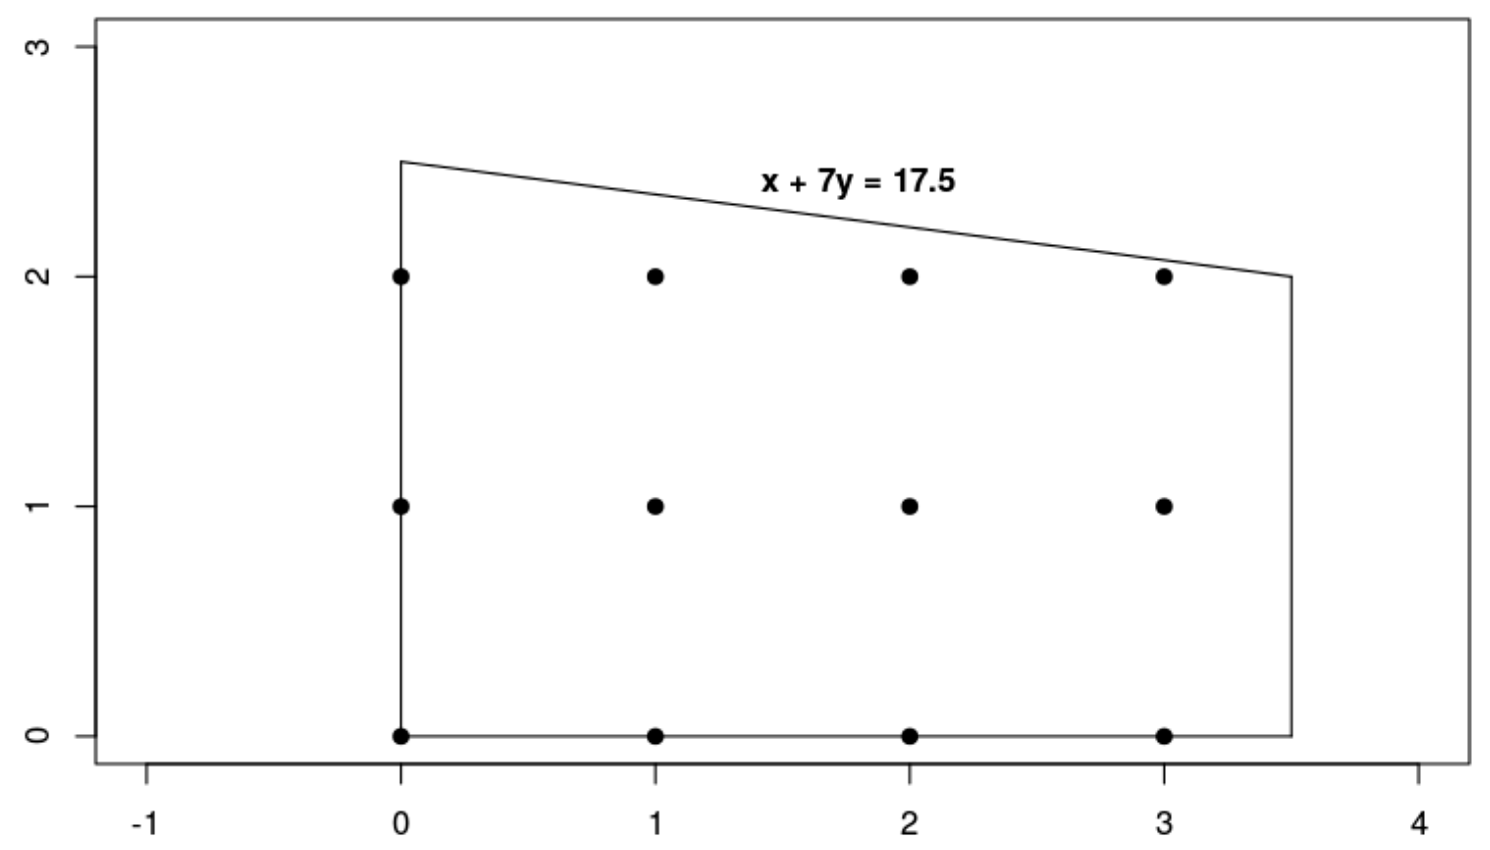

In [8]:
import ortoolpy

In [9]:
from ortools.linear_solver import pywraplp

# Create the mip solver with the CBC backend.
# Coin-or branch and cut (CBC) solver 
solver = pywraplp.Solver.CreateSolver('simple_mip_program', 'CBC')

In [10]:
infinity = solver.infinity()
# 정수 변수 x, y 선언 (양수) 
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')

print('Number of variables =', solver.NumVariables())

# x + 7 * y <= 17.5.
solver.Add(x + 7 * y <= 17.5)

# x <= 3.5.
solver.Add(x <= 3.5)

print('Number of constraints =', solver.NumConstraints())

# Maximize x + 10 * y.
solver.Maximize(x + 10 * y)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

Number of variables = 2
Number of constraints = 2
Solution:
Objective value = 23.0
x = 3.0
y = 2.0


## 일반 선형 문제
- 정수 조건을 일반 숫자로 변경한 경우
- Solver 변경 (MIP --> LP)
- 아래 부분 변경 (정수 --> 일반 수)

x = solver.NumVar(0, infinity, 'x')  
y = solver.NumVar(0, infinity, 'y')  

In [11]:
solver = pywraplp.Solver('simple_lp_program',
                          pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

In [12]:
# 일반 변수 x, y 선언 (양수) 
x = solver.NumVar(0, infinity, 'x')
y = solver.NumVar(0, infinity, 'y')

print('Number of variables =', solver.NumVariables())

# x + 7 * y <= 17.5.
solver.Add(x + 7 * y <= 17.5)

# x <= 3.5.
solver.Add(x <= 3.5)

print('Number of constraints =', solver.NumConstraints())

# Maximize x + 10 * y.
solver.Maximize(x + 10 * y)

status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

Number of variables = 2
Number of constraints = 2
Solution:
Objective value = 25.0
x = 0.0
y = 2.5


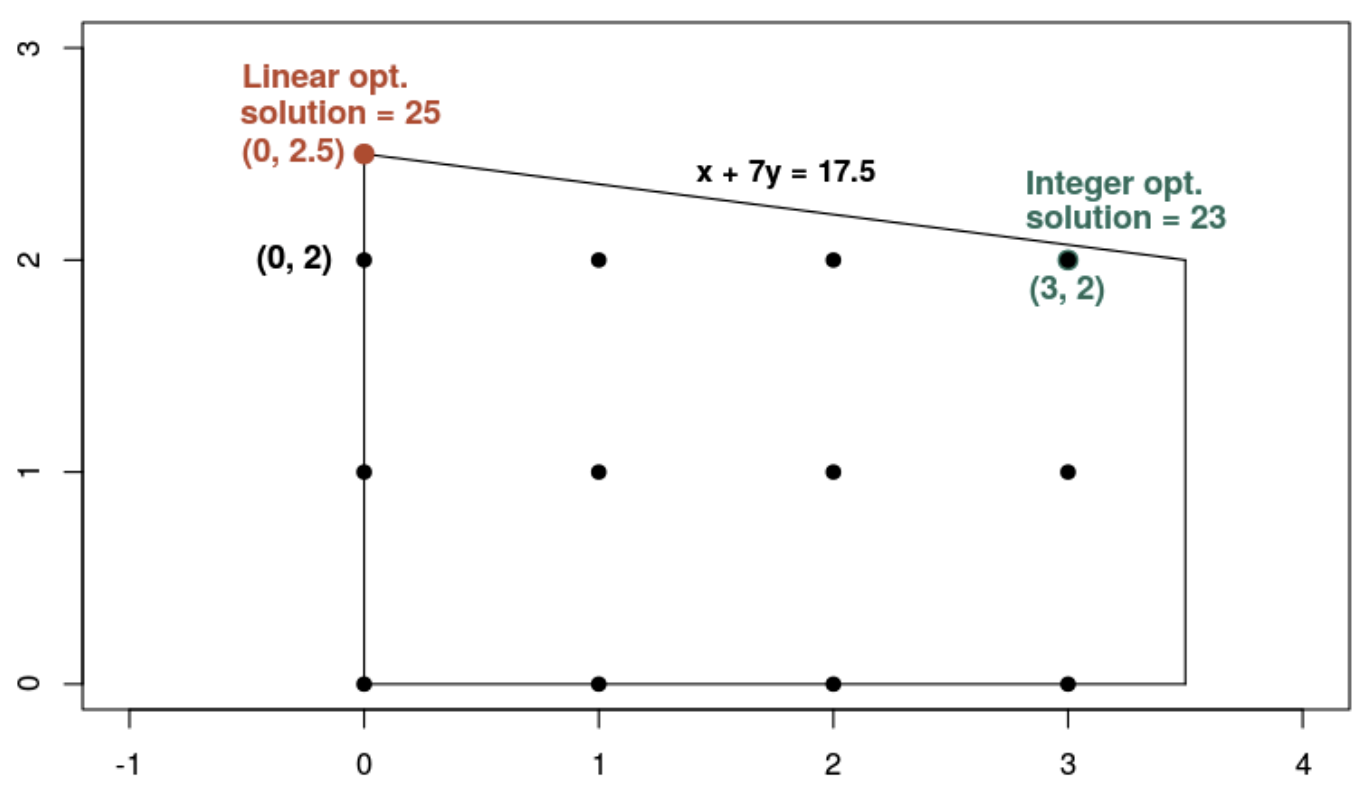

### 전혀 다른 곳의 값이 나오는 것에 주의!